In [1]:
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Загрузка данных
url = "https://docs.google.com/spreadsheets/d/1draL0IcMP94h3YChWrHMxfI0AG3gTBgNoXO3lqj0jKE/export?format=csv&gid=701508041"
df = pd.read_csv(url)

In [4]:
# Первичный осмотр данных
print(df.head())

   №           Offer ID           Категория                 Номенклатура  \
0  1         50810_ch_2           Подстолье                 Для 1600x800   
1  2  50885_z_chmatgl_5  Компьютерные столы           Подъемный 1600x800   
2  3         51392_bk_3          Столешница  прямоугольная 2000х900 (36)   
3  4       51396_t_ch_8     Обеденные столы                     1400х800   
4  5       51780_t_ch_6     Обеденные столы               1800х1000 (36)   

                Фактура Маркетинговая цена Мин. цена конкурентов  
0  Металлокаркас Черный              289,5                207,54  
1     Дуб золотой крафт            3072,15                     0  
2       Дуб белый крафт             416,73                     0  
3    Дуб табачный крафт             528,78                466,41  
4    Дуб табачный крафт             775,68                748,29  


In [5]:
# информация о содержании данных
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   №                      314 non-null    int64 
 1   Offer ID               314 non-null    object
 2   Категория              314 non-null    object
 3   Номенклатура           314 non-null    object
 4   Фактура                314 non-null    object
 5   Маркетинговая цена     314 non-null    object
 6   Мин. цена конкурентов  314 non-null    object
dtypes: int64(1), object(6)
memory usage: 17.3+ KB
None


In [6]:
# описательная статистика
print(df.describe())

                №
count  314.000000
mean   157.500000
std     90.788215
min      1.000000
25%     79.250000
50%    157.500000
75%    235.750000
max    314.000000


In [7]:
# 1. Функция для безопасного преобразования цен
def convert_price(price):
    if isinstance(price, str):
        # Удаляем все нечисловые символы (кроме цифр, точек и запятых)
        cleaned = ''.join(c for c in price if c.isdigit() or c in {',', '.'})
        # Заменяем запятые на точки
        cleaned = cleaned.replace(',', '.')
        # Если после очистки строка пустая - возвращаем NaN
        if not cleaned:
            return np.nan
        try:
            return float(cleaned)
        except ValueError:
            return np.nan
    elif isinstance(price, (int, float)):
        return float(price)
    else:
        return np.nan



In [8]:
# 2. Применяем функцию к ценовым колонкам
df['Маркетинговая цена'] = df['Маркетинговая цена'].apply(convert_price)
df['Мин. цена конкурентов'] = df['Мин. цена конкурентов'].apply(convert_price)



In [9]:
# 3. Заменяем нули и некорректные значения в ценах конкурентов на NaN
df['Мин. цена конкурентов'] = df['Мин. цена конкурентов'].replace(0, np.nan)


In [10]:
# 4. Проверяем результат
print("Уникальные значения в 'Маркетинговая цена':", df['Маркетинговая цена'].unique()[:10])
print("Уникальные значения в 'Мин. цена конкурентов':", df['Мин. цена конкурентов'].unique()[:10])
print("\nКоличество пропущенных значений:")
print(df[['Маркетинговая цена', 'Мин. цена конкурентов']].isna().sum())


Уникальные значения в 'Маркетинговая цена': [ 289.5  3072.15  416.73  528.78  775.68  382.71  526.83  381.15  910.35
  261.39]
Уникальные значения в 'Мин. цена конкурентов': [207.54    nan 466.41 748.29 345.63 343.68 584.61 634.14 292.35 316.14]

Количество пропущенных значений:
Маркетинговая цена         0
Мин. цена конкурентов    133
dtype: int64


In [11]:
# 5. Основные статистики
print("\nОсновные статистики по ценам:")
print(df[['Маркетинговая цена', 'Мин. цена конкурентов']].describe().applymap(
    lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x))


Основные статистики по ценам:
      Маркетинговая цена Мин. цена конкурентов
count             314.00                181.00
mean              608.30                464.41
std               438.10                266.86
min                87.36                 60.90
25%               347.99                266.97
50%               506.37                365.25
75%               753.68                612.66
max              3072.15               1403.37


C:\Users\Professional\AppData\Local\Temp\ipykernel_692\1449521644.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df[['Маркетинговая цена', 'Мин. цена конкурентов']].describe().applymap(


In [12]:
# 1. Анализ пропущенных данных
print("Анализ пропущенных цен конкурентов:")
print(f"Всего товаров: {len(df)}")
print(f"Товаров с данными о конкурентах: {len(df) - df['Мин. цена конкурентов'].isna().sum()}")
print(f"Товаров без данных о конкурентах: {df['Мин. цена конкурентов'].isna().sum()}")



Анализ пропущенных цен конкурентов:
Всего товаров: 314
Товаров с данными о конкурентах: 181
Товаров без данных о конкурентах: 133


## 1. Интерпретация данных о пропущенных значениях:
    42% товаров (133 из 314) не имеют данных о конкурентах. Это может означать:

        - Уникальные товары в вашем ассортименте
        - Пробелы в конкурентном анализе
        - Новинки рынка, которые еще не появились у конкурентов


##  2. Стратегические рекомендации:
    
    Для товаров с данными о конкурентах (181 товар):
    
            Товары дороже конкурентов на 50%+ (если такие есть):

        ** Провести ABC-анализ: действительно ли эти товары приносят прибыль?
        ** Рассмотреть bundle-предложения (связки с более популярными товарами)
        ** Усилить USP (уникальные торговые предложения) для этих позиций

            Товары дешевле конкурентов на 10%+:
            
        ** Проверить маржинальность - возможно необоснованное демпингование
        ** Проанализировать возможность постепенного повышения цены до рыночного уровня
        ** Конкурентоспособные товары (±10% к рынку):
        ** Оптимизировать рекламные бюджеты - эти товары могут быть "локомотивами"
        ** Мониторить динамику цен конкурентов

In [13]:
unique_products = df[df['Мин. цена конкурентов'].isna()]
print("Топ-5 категорий с уникальными товарами:")
print(unique_products['Категория'].value_counts().head(5))

Топ-5 категорий с уникальными товарами:
Категория
Компьютерные столы    47
Столешница            40
Обеденные столы       23
Подстолье             11
Сад                   10
Name: count, dtype: int64


C:\Users\Professional\AppData\Local\Temp\ipykernel_692\3137680064.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=missing_data, palette=['green', 'red'])
C:\Users\Professional\AppData\Local\Temp\ipykernel_692\3137680064.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Да', 'Нет'])


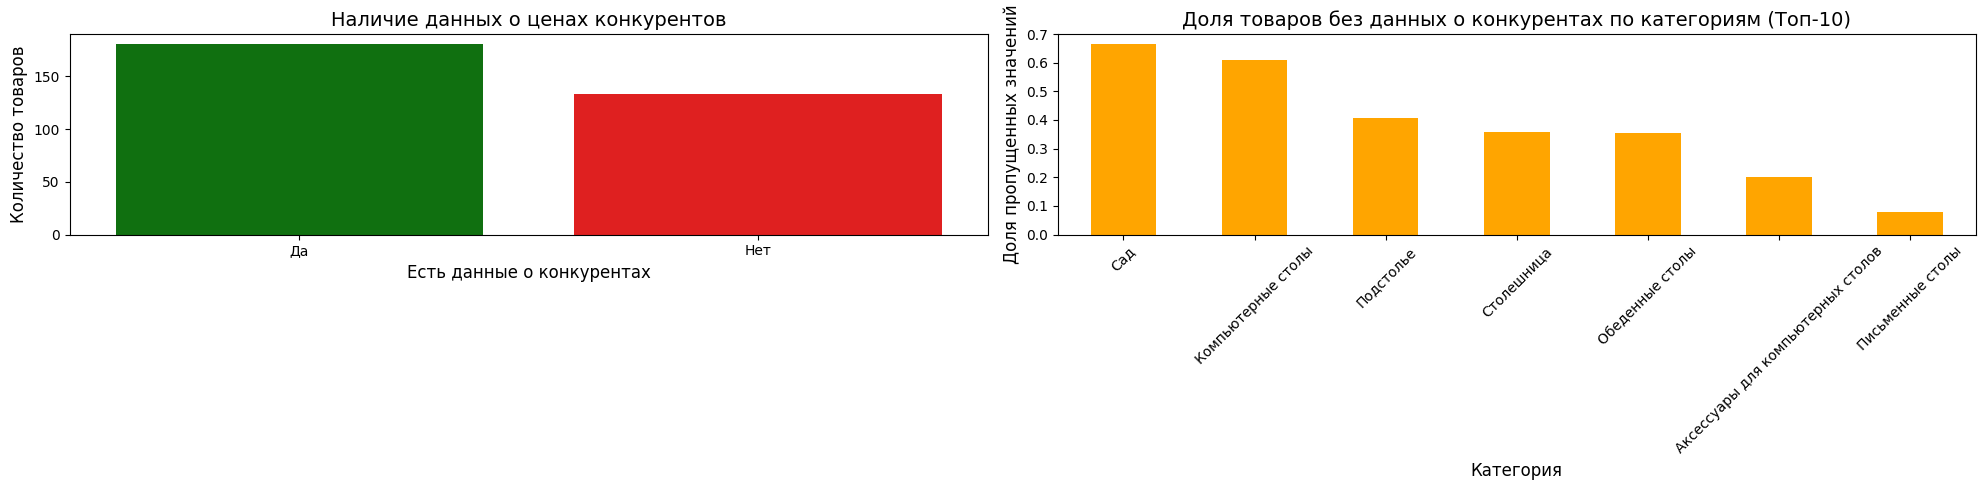

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем фигуру с двумя подграфиками (1 строка, 2 столбца)
plt.figure(figsize=(20, 5))

# Первый график - распределение пропущенных значений
plt.subplot(1, 2, 1)  # 1 строка, 2 столбца, позиция 1
missing_data = df['Мин. цена конкурентов'].isna()
ax = sns.countplot(x=missing_data, palette=['green', 'red'])
plt.title('Наличие данных о ценах конкурентов', fontsize=14)
plt.xlabel('Есть данные о конкурентах', fontsize=12)
plt.ylabel('Количество товаров', fontsize=12)
ax.set_xticklabels(['Да', 'Нет'])

# Второй график - распределение по категориям
plt.subplot(1, 2, 2)  # 1 строка, 2 столбца, позиция 2
category_missing = df.groupby('Категория')['Мин. цена конкурентов'].apply(lambda x: x.isna().mean())
category_missing.sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('Доля товаров без данных о конкурентах по категориям (Топ-10)', fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Доля пропущенных значений', fontsize=12)
plt.xticks(rotation=45)

# Регулируем расстояние между графиками
plt.tight_layout()
plt.show()

## РЕКОМЕНДАЦИИ

    Немедленные меры:

        ** Сформировать список 10 самых дорогих уникальных товаров для проверки
        ** Выявить 5 категорий с наибольшим количеством "бесконкурентных" товаров

    Среднесрочные меры:

        ** Настроить систему мониторинга цен конкурентов
        ** Разработать методику ценообразования для уникальных товаров

    Долгосрочные меры:

        ** Внедрить динамическое ценообразование
        ** Разработать KPI по покрытию конкурентного анализа

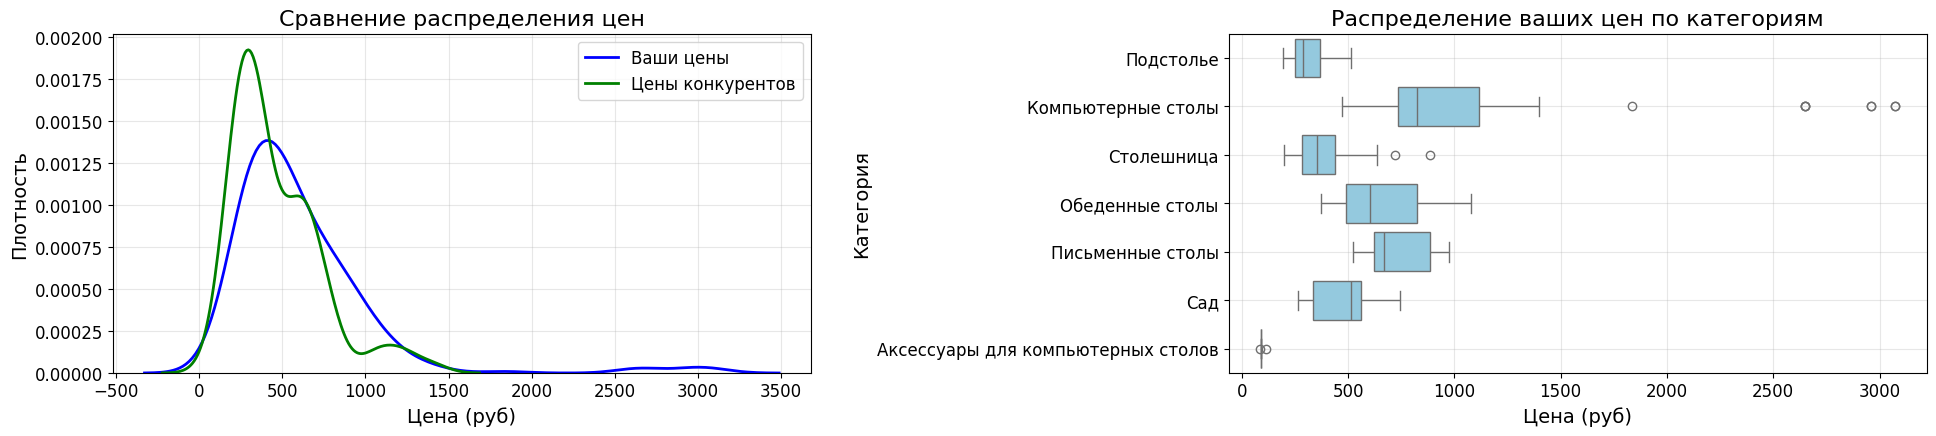

In [15]:
plt.figure(figsize=(20, 5))  # Увеличиваем размер фигуры для двух графиков

# График 1: Сравнение распределения цен (левый)
plt.subplot(1, 2, 1)  # 1 строка, 2 столбца, позиция 1
sns.kdeplot(df['Маркетинговая цена'], color='blue', label='Ваши цены', linewidth=2)
sns.kdeplot(df['Мин. цена конкурентов'].dropna(), color='green', label='Цены конкурентов', linewidth=2)
plt.title('Сравнение распределения цен', fontsize=16)
plt.xlabel('Цена (руб)', fontsize=14)
plt.ylabel('Плотность', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# График 2: Boxplot цен по категориям (правый)
plt.subplot(1, 2, 2)  # 1 строка, 2 столбца, позиция 2
sns.boxplot(x='Маркетинговая цена', y='Категория', data=df, orient='h', color='skyblue')
plt.title('Распределение ваших цен по категориям', fontsize=16)
plt.xlabel('Цена (руб)', fontsize=14)
plt.ylabel('Категория', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout(pad=3.0)  # Добавляем больше пространства между графиками
plt.show()

In [27]:
import pandas as pd
import numpy as np
from IPython.display import display

# 1. Подготовка данных
analysis_table = df.groupby('Категория').agg({
    'Маркетинговая цена': ['count', 'median', 'mean', 'std'],
    'Мин. цена конкурентов': ['count', 'median', 'mean', 'std']
}).dropna(how='all')

# 2. Расчет показателей
analysis_table['Разница (руб)'] = analysis_table[('Маркетинговая цена', 'median')] - analysis_table[('Мин. цена конкурентов', 'median')]
analysis_table['Разница (%)'] = (analysis_table['Разница (руб)'] / analysis_table[('Мин. цена конкурентов', 'median')]) * 100
analysis_table['Конкурентоспособность'] = np.where(
    analysis_table['Разница (руб)'] < 0, 
    "Выгоднее", 
    np.where(analysis_table['Разница (руб)'] == 0, "Наравне", "Дороже")
)

# 3. Переименование столбцов для читаемости
analysis_table.columns = [
    'Товаров (ваши)', 'Медиана (ваши)', 'Среднее (ваши)', 'Ст.откл. (ваши)',
    'Товаров (конк.)', 'Медиана (конк.)', 'Среднее (конк.)', 'Ст.откл. (конк.)',
    'Разница (руб)', 'Разница (%)', 'Конкурентоспособность'
]

# 4. Сортировка по разнице цен
analysis_table = analysis_table.sort_values('Разница (руб)', ascending=False)

# 5. Стилизация таблицы
def color_diff(val):
    color = 'red' if val > 0 else 'green' if val < 0 else 'gray'
    return f'color: {color}'

styled_table = (analysis_table.style
    .format({
        'Медиана (ваши)': '{:,.0f} руб',
        'Медиана (конк.)': '{:,.0f} руб',
        'Среднее (ваши)': '{:,.0f} руб',
        'Среднее (конк.)': '{:,.0f} руб',
        'Разница (руб)': '{:+,.0f} руб',
        'Разница (%)': '{:+.1f}%',
        'Ст.откл. (ваши)': '{:,.1f}',
        'Ст.откл. (конк.)': '{:,.1f}'
    })
    .applymap(color_diff, subset=['Разница (руб)', 'Разница (%)'])
    .background_gradient(cmap='RdYlGn', subset=['Разница (%)'])
    .set_properties(**{
        'text-align': 'center',
        'font-size': '12px'
    })
    .set_table_styles([{
        'selector': 'th',
        'props': [('font-size', '13px'), ('text-align', 'center')]
    }])
    .set_caption('<h2>Сравнительный анализ цен по категориям</h2>')
    .highlight_max(subset=['Разница (руб)'], color='#ffcccc')
    .highlight_min(subset=['Разница (руб)'], color='#ccffcc'))

C:\Users\Professional\AppData\Local\Temp\ipykernel_692\4156329513.py:46: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_diff, subset=['Разница (руб)', 'Разница (%)'])


In [28]:
# Для Jupyter Notebook
display(styled_table)

# Для сохранения в HTML (если нужно)
styled_table.to_html('price_analysis.html')

,Товаров (ваши),Медиана (ваши),Среднее (ваши),Ст.откл. (ваши),Товаров (конк.),Медиана (конк.),Среднее (конк.),Ст.откл. (конк.),Разница (руб),Разница (%),Конкурентоспособность
Категория,,,,,,,,,,,
Компьютерные столы,77,825 руб,"1,051 руб",627.3,30,685 руб,803 руб,306.6,+140 руб,+20.5%,Дороже
Столешница,112,354 руб,375 руб,116.6,72,270 руб,283 руб,74.9,+84 руб,+31.0%,Дороже
Обеденные столы,65,604 руб,649 руб,194.1,42,534 руб,555 руб,154.3,+71 руб,+13.2%,Дороже
Письменные столы,13,671 руб,734 руб,157.6,12,663 руб,753 руб,176.6,+8 руб,+1.2%,Дороже
Подстолье,27,290 руб,321 руб,97.3,16,285 руб,274 руб,53.6,+4 руб,+1.4%,Дороже
Аксессуары для компьютерных столов,5,91 руб,95 руб,10.4,4,113 руб,102 руб,28.4,-22 руб,-19.6%,Выгоднее
Сад,15,515 руб,480 руб,165.9,5,568 руб,489 руб,116.2,-52 руб,-9.2%,Выгоднее


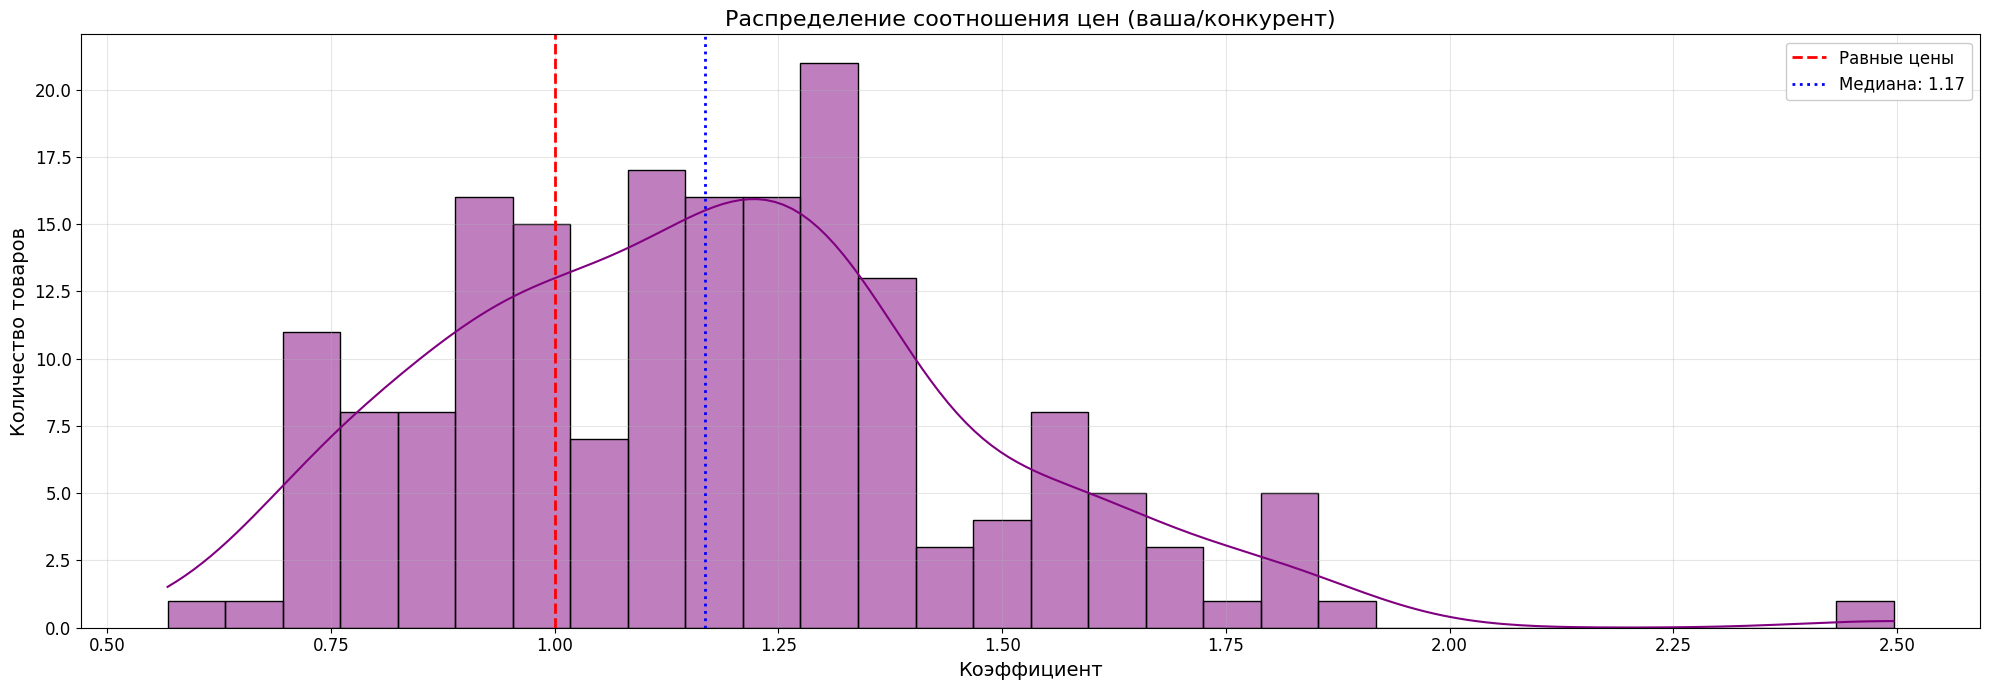

In [16]:
# График 3: Соотношение цен
plt.figure(figsize=(20, 7)) 

df['Соотношение цен'] = df['Маркетинговая цена'] / df['Мин. цена конкурентов']
ax = sns.histplot(df['Соотношение цен'].dropna(), bins=30, color='purple', kde=True)

# Настройки заголовков и подписей
plt.title('Распределение соотношения цен (ваша/конкурент)', fontsize=16)
plt.xlabel('Коэффициент', fontsize=14)
plt.ylabel('Количество товаров', fontsize=14)

# Вертикальные линии и легенда
plt.axvline(1, color='red', linestyle='--', linewidth=2, label='Равные цены')
median_val = df['Соотношение цен'].median()
plt.axvline(median_val, color='blue', linestyle=':', linewidth=2, 
            label=f'Медиана: {median_val:.2f}')

# Настройки легенды и сетки
plt.legend(fontsize=12, framealpha=1)
plt.grid(True, alpha=0.3)

# Увеличиваем размер шкалы
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Оптимизация расположения элементов
plt.tight_layout()
plt.show()


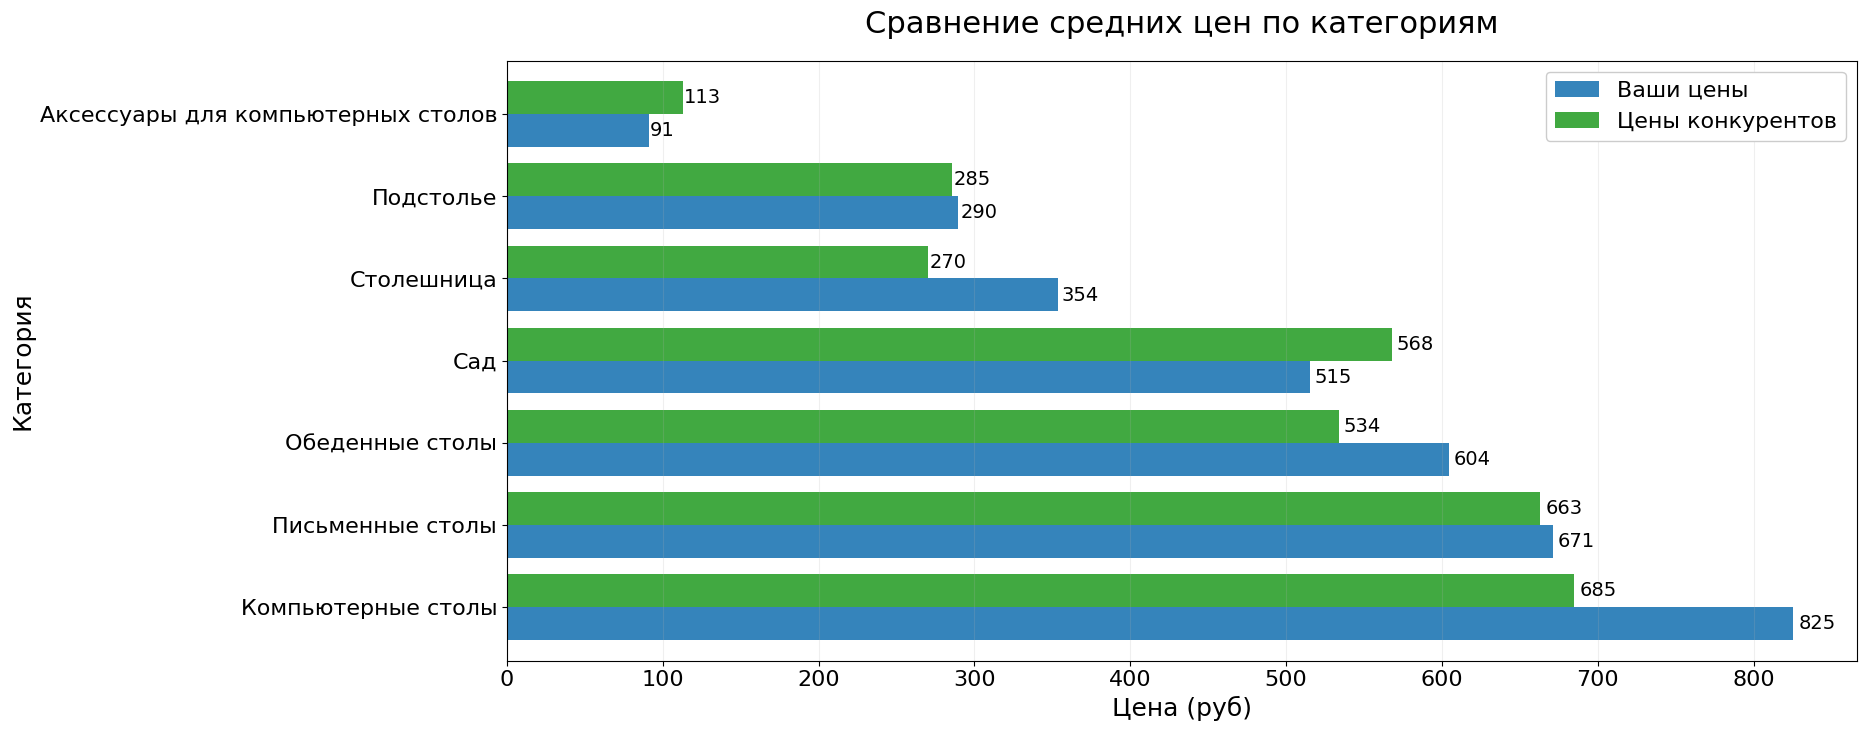

In [17]:
fig, ax = plt.subplots(figsize=(18, 8)) 

# Подготовка данных
category_stats = df.groupby('Категория')[['Маркетинговая цена', 'Мин. цена конкурентов']].median()
category_stats = category_stats.sort_values('Маркетинговая цена', ascending=False)

# Рисуем горизонтальные столбцы
category_stats.plot(
    kind='barh',
    ax=ax,  # Явно указываем ось
    width=0.8,
    color=['#1f77b4', '#2ca02c'],  # Оптимальные цвета
    alpha=0.9
)

# Настройки оформления
ax.set_title('Сравнение средних цен по категориям', fontsize=22, pad=20)
ax.set_xlabel('Цена (руб)', fontsize=18)
ax.set_ylabel('Категория', fontsize=18)
ax.grid(True, axis='x', alpha=0.2)

# Увеличиваем шрифты
ax.tick_params(axis='both', labelsize=16)

# Легенда
ax.legend(
    ['Ваши цены', 'Цены конкурентов'],
    fontsize=16,
    loc='upper right',
    framealpha=1
)

# Подписи значений (только для широких столбцов)
for p in ax.patches:
    width = p.get_width()
    if width > category_stats.values.max() * 0.05:  # Подписываем только значимые
        ax.annotate(
            f'{width:.0f}',
            (width * 1.005, p.get_y() + p.get_height()/2),
            ha='left', va='center',
            fontsize=14,
            color='black'
        )

# Критически важная настройка!
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.9)
plt.show()

In [18]:
import pandas as pd

# Рассчитываем статистики
price_comparison = df.groupby('Категория').agg({
    'Маркетинговая цена': 'median',
    'Мин. цена конкурентов': 'median'
}).dropna()

# Добавляем расчет отклонений
price_comparison['Отклонение'] = price_comparison['Маркетинговая цена'] - price_comparison['Мин. цена конкурентов']
price_comparison['Отклонение %'] = (price_comparison['Отклонение'] / price_comparison['Мин. цена конкурентов']) * 100

# Сортируем по отклонению
price_comparison = price_comparison.sort_values('Отклонение', ascending=False)

# Форматируем числа
styled_table = (price_comparison
                .style
                .format({
                    'Маркетинговая цена': '{:,.0f} руб',
                    'Мин. цена конкурентов': '{:,.0f} руб',
                    'Отклонение': '{:+,.0f} руб',
                    'Отклонение %': '{:+.1f}%'
                })
                .background_gradient(cmap='RdYlGn', subset=['Отклонение %'])
                .set_caption('Сравнение цен по категориям'))

In [19]:
from IPython.display import display

# Выводим стилизованную таблицу
display(styled_table)

# Альтернативно можно сохранить в HTML
# styled_table.to_html('price_comparison_table.html')

,Маркетинговая цена,Мин. цена конкурентов,Отклонение,Отклонение %
Категория,,,,
Компьютерные столы,825 руб,685 руб,+140 руб,+20.5%
Столешница,354 руб,270 руб,+84 руб,+31.0%
Обеденные столы,604 руб,534 руб,+71 руб,+13.2%
Письменные столы,671 руб,663 руб,+8 руб,+1.2%
Подстолье,290 руб,285 руб,+4 руб,+1.4%
Аксессуары для компьютерных столов,91 руб,113 руб,-22 руб,-19.6%
Сад,515 руб,568 руб,-52 руб,-9.2%


In [20]:
# 3. Анализ ценового позиционирования
print("\nАнализ ценового позиционирования:")

# Рассчитываем дополнительные метрики
df['Разница цен'] = df['Маркетинговая цена'] - df['Мин. цена конкурентов']
df['Превышение цены (%)'] = (df['Разница цен'] / df['Мин. цена конкурентов']) * 100

# Группируем товары по уровню цены
price_position = pd.cut(df['Соотношение цен'], 
                       bins=[0, 0.9, 1.1, 1.5, np.inf],
                       labels=['Дешевле >10%', 'Конкурентоспособно (±10%)', 'Дороже 10-50%', 'Дороже >50%'])

print("\nРаспределение товаров по ценовому позиционированию:")
print(price_position.value_counts().sort_index())




Анализ ценового позиционирования:

Распределение товаров по ценовому позиционированию:
Соотношение цен
Дешевле >10%                 30
Конкурентоспособно (±10%)    40
Дороже 10-50%                84
Дороже >50%                  27
Name: count, dtype: int64


In [21]:
# 4. Рекомендации по ценовой стратегии
print("\nРекомендации по ценовой стратегии:")

# Анализ переоцененных товаров
overpriced = df[df['Соотношение цен'] > 1.5]
if not overpriced.empty:
    print(f"\nТовары с завышенной ценой (>50% дороже конкурентов) - {len(overpriced)} шт:")
    print(overpriced[['Категория', 'Номенклатура', 'Маркетинговая цена', 'Мин. цена конкурентов', 'Соотношение цен']]
          .sort_values('Соотношение цен', ascending=False)
          .head(10)
          .to_string(index=False))




Рекомендации по ценовой стратегии:

Товары с завышенной ценой (>50% дороже конкурентов) - 27 шт:
      Категория                  Номенклатура  Маркетинговая цена  Мин. цена конкурентов  Соотношение цен
     Столешница   прямоугольная 1400х700 (36)              406.35                 162.78         2.496314
     Столешница С закруг.углами 1400х800 (36)              437.07                 232.20         1.882300
     Столешница   прямоугольная 1400х700 (36)              385.50                 210.48         1.831528
     Столешница С закруг.углами 1400х800 (36)              437.07                 239.49         1.825003
     Столешница   прямоугольная 1300х800 (36)              397.47                 219.75         1.808737
     Столешница   прямоугольная 1200х700 (36)              344.52                 191.46         1.799436
     Столешница С закруг.углами 1400х800 (36)              437.07                 243.75         1.793108
     Столешница      геймерская 1600х800 (36)         

In [22]:
# Анализ недооцененных товаров
underpriced = df[df['Соотношение цен'] < 0.9]
if not underpriced.empty:
    print(f"\nТовары с заниженной ценой (>10% дешевле конкурентов) - {len(underpriced)} шт:")
    print(underpriced[['Категория', 'Номенклатура', 'Маркетинговая цена', 'Мин. цена конкурентов', 'Соотношение цен']]
          .sort_values('Соотношение цен')
          .head(10)
          .to_string(index=False))



Товары с заниженной ценой (>10% дешевле конкурентов) - 30 шт:
      Категория            Номенклатура  Маркетинговая цена  Мин. цена конкурентов  Соотношение цен
Обеденные столы          1600х1000 (36)              425.91                 750.69         0.567358
Обеденные столы          1600х1000 (36)              485.58                 741.18         0.655144
     Столешница Овальная 1600х1000 (36)              243.33                 341.79         0.711928
     Столешница Овальная 1800х1000 (36)              272.43                 382.59         0.712068
     Столешница Овальная 1800х1000 (36)              272.43                 382.59         0.712068
     Столешница Овальная 1600х1000 (36)              243.33                 337.47         0.721042
     Столешница Овальная 1600х1000 (36)              247.65                 341.79         0.724568
            Сад    Керамогранит 600х600              263.76                 361.53         0.729566
            Сад    Керамогранит 600х6

In [23]:
# Анализ товаров без конкурентов
no_competition = df[df['Мин. цена конкурентов'].isna()]
print(f"\nУникальные товары без конкурентов - {len(no_competition)} шт:")
print("Распределение по категориям:")
print(no_competition['Категория'].value_counts().head(10))


Уникальные товары без конкурентов - 133 шт:
Распределение по категориям:
Категория
Компьютерные столы                    47
Столешница                            40
Обеденные столы                       23
Подстолье                             11
Сад                                   10
Письменные столы                       1
Аксессуары для компьютерных столов     1
Name: count, dtype: int64


In [31]:
import pandas as pd
from IPython.display import display

# Данные
category_strategy = pd.DataFrame({
    'Категория': ['Компьютерные столы', 'Столешница', 'Обеденные столы', 'Подстолье', 'Сад'],
    'Уникальные товары': [47, 40, 23, 11, 10],
    'Рекомендуемая наценка (%)': [25, 20, 15, 10, 15],
    'Приоритет': [1, 2, 3, 4, 5]
})

# Стилизация таблицы
def style_table(df):
    # Цвета фона для приоритетов (светлые тона)
    priority_bg_colors = {
        1: '#FFCDD2',  # Светло-красный
        2: '#FFE0B2',  # Светло-оранжевый
        3: '#FFF9C4',  # Светло-желтый
        4: '#C8E6C9',  # Светло-зеленый
        5: '#B3E5FC'   # Светло-синий
    }
    
    # Основные стили
    styles = [
        # Заголовок таблицы
        {'selector': 'caption',
         'props': [('font-size', '18px'),
                   ('font-weight', 'bold'),
                   ('color', 'black'),
                   ('margin-bottom', '15px')]},
        
        # Заголовки столбцов
        {'selector': 'th',
         'props': [('background-color', '#424242'),
                  ('color', 'white'),
                  ('font-weight', 'bold'),
                  ('font-size', '14px'),
                  ('text-align', 'center'),
                  ('padding', '10px'),
                  ('border', '1px solid white')]},
        
        # Основные ячейки
        {'selector': 'td',
         'props': [('font-size', '13px'),
                  ('font-weight', 'bold'),
                  ('text-align', 'center'),
                  ('padding', '10px'),
                  ('border', '1px solid #e0e0e0'),
                  ('color', 'black')]},  # Черный шрифт везде
        
        # Чередование строк для лучшей читаемости
        {'selector': 'tr:nth-of-type(even)',
         'props': [('background-color', '#f5f5f5')]},  # Светло-серый
        
        {'selector': 'tr:nth-of-type(odd)',
         'props': [('background-color', 'white')]},  # Белый
        
        # Ячейки с категориями - особое выделение
        {'selector': 'td:nth-child(1)',
         'props': [('font-weight', 'bold'),
                  ('color', '#0d47a1'),  # Темно-синий
                  ('text-align', 'left'),
                  ('padding-left', '15px')]}
    ]
    
    # Применяем стили
    styled = (df.style
              .set_table_styles(styles)
              .set_caption('СТРАТЕГИЯ ДЛЯ УНИКАЛЬНЫХ ТОВАРОВ')
              .background_gradient(subset=['Уникальные товары'], 
                                 cmap='Blues',
                                 text_color_threshold=0.5)  # Автоподбор цвета текста
              .apply(lambda x: [f'background-color: {priority_bg_colors[v]}' 
                               for v in x], 
                    subset=['Приоритет'])
              .applymap(lambda x: 'color: #d32f2f' if x < 15 else 'color: #388e3c', 
                       subset=['Рекомендуемая наценка (%)'])
              .format({'Рекомендуемая наценка (%)': '{:.0f}%'})
              .set_properties(**{'border-collapse': 'collapse'})
              .hide(axis='index'))
    
    return styled

# Отображаем таблицу
display(style_table(category_strategy))

C:\Users\Professional\AppData\Local\Temp\ipykernel_692\3736465624.py:76: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda x: 'color: #d32f2f' if x < 15 else 'color: #388e3c',


Категория,Уникальные товары,Рекомендуемая наценка (%),Приоритет
Компьютерные столы,47,25%,1
Столешница,40,20%,2
Обеденные столы,23,15%,3
Подстолье,11,10%,4
Сад,10,15%,5
